# Capstone 2: Data Wrangling

# Imports 

In [1]:
#Import necessary packages/libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import datetime as dt
import os
import seaborn as sns

The dataset used in this project is from Inside Airbnb and contains detailed information on each listing on the platform. It was compiled on Sept. 1, 2021.
It can be found here: http://insideairbnb.com/get-the-data.html

In [2]:
#This is the dataset with detailed info on the listings, compiled by Inside Airbnb Sept. 1, 2021
df_listings = pd.read_csv('NYC/listings_detailed.csv')

In [3]:
pd.set_option('display.max_columns', None)

# Overall Initial Look At The Dataset

A data dictionary for both datasets is available <a href="https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=150111846">here</a>, provided by InsideAirbnb.

First, the **df_listings** dataset:

In [4]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,2.021090e+13,9/2/2021,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,9/9/2008,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,a few days or more,34%,19%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,5,35,65,340,9/2/2021,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,2.021090e+13,9/2/2021,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,12/7/2008,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,86%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",$76.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,4,9,208,9/2/2021,408,58,0,1/5/2015,6/29/2021,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.03
2,5121,https://www.airbnb.com/rooms/5121,2.021090e+13,9/2/2021,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2/3/2009,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,9/2/2021,50,0,0,1/

In [5]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  float64
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35710 non-null  object 
 6   neighborhood_overview                         22510 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                                      36923 non-null 

## Finding Missing Values

In [6]:
df_listings.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              13
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               9296
Length: 74, dtype: int64

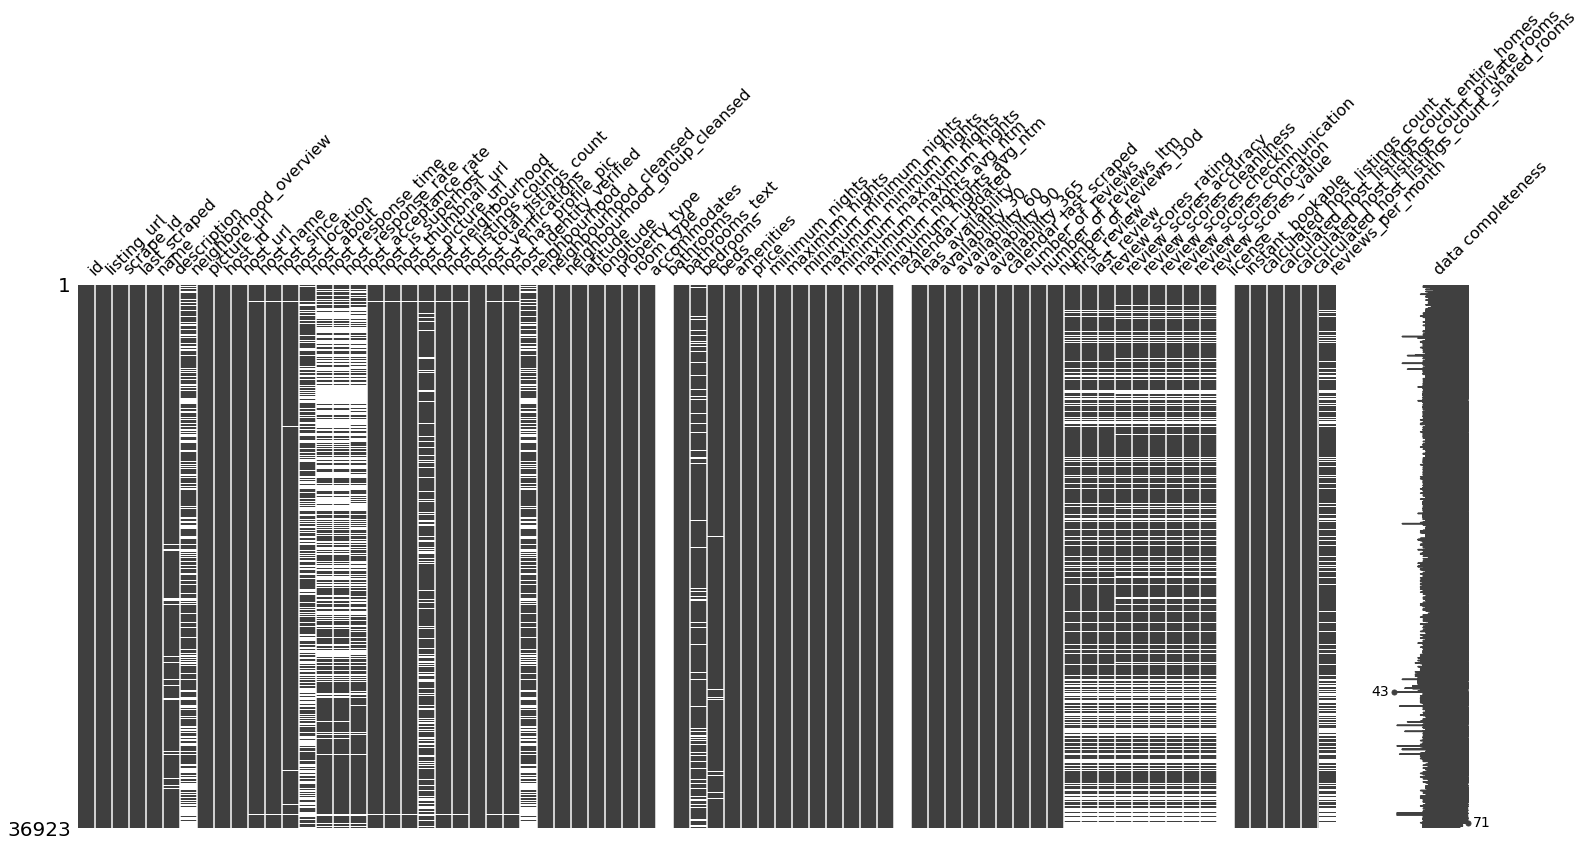

In [7]:
msno.matrix(df_listings, labels = True)
plt.show()

In [8]:
df_listings.duplicated().sum()

0

## Dropping Columns

Drop columns that are not relevant

In [9]:
drop_cols = ['last_scraped', 'picture_url', 'host_url', 'host_thumbnail_url', 'host_picture_url', 'calendar_last_scraped', 'listing_url', 'scrape_id']
df1 = df_listings.drop(drop_cols, axis=1)

Dropping columns that have all missing values

In [10]:
df1.drop(['bathrooms', 'calendar_updated', 'license', 'neighbourhood'], axis=1, inplace=True)

Dropping the columns that have a large majority of missing values. 
**neighborhood_overview** and **host_about** have 39.0% and 41.4% missing values respectively.

In [11]:
df1.drop(['neighborhood_overview', 'host_about'], axis=1, inplace=True)

Lastly, dropping some text-only columns. While some of these columns could have a pertinent effect on the price of a unit, it will require knowledge of NLP to understand and unpack. As that is out of the scope for Capstone 2, I will be dropping those columns from this dataset. 

In [12]:
df1.drop(['name', 'description', 'host_id', 'host_name', 'host_neighbourhood',  'host_location'], axis=1, inplace=True)

In [13]:
df1.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,9/9/2008,a few days or more,34%,19%,f,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1 bath,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,5,35,65,340,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,3,3,0,0,0.33
1,3831,12/7/2008,within a day,50%,86%,f,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,1 bath,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",$76.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,4,9,208,408,58,0,1/5/2015,6/29/2021,4.46,4.59,4.50,4.79,4.81,4.72,4.65,f,1,1,0,0,5.03
2,5121,2/3/2009,within a day,100%,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,t,30,60,90,365,50,0,0,1/22/2014,6/5/2016,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,1,0,1,0,0.54
3,5136,2/3/2009,within a day,50%,33%,f,1.0,1.0,"['email', 'phone', 'reviews']",t,t,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,1.5 baths,2.0,2.0,"[""Dryer"", ""BBQ grill"", ""Kitchen"", ""Long term s...",$275.00,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,t,0,0,0,204,2,1,1,1/2/2014,8/8/2021,5.00,5.00,5.00,5.00,5.00,4.50,5.00,f,1,1,0,0,0.02
4,5178,3/3/2009,within an hour,100%,100%,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,Midtown,Manhattan,40.76457,-73.98317,Private room in rental unit,Private room,2,1 bath,1.0,1.0,"[""Hot water"", ""Bed linens"", ""Extra pillows and...",$68.00,2,14,2.0,2.0,14.0,14.0,2.0,14.0,t,1,5,14,243,490,17,2,8/18/2010,8/14/2021,4.21,4.20,3.73,4.66,4.40,4.86,4.36,f,1,0,1,0,3.64


# Detailed Look At _df1_

## Individual Columns

### id

In [14]:
df1['id'].isna().sum()

0

No missing values. Thus, leaving the column as is.

### **host_since**

**From the data dictionary:** The date the host/user was created. For hosts that are Airbnb guests this could be the date they registered as a guest.

In [15]:
#Convert from object to datetime
df1['host_since'] = pd.to_datetime(df1['host_since'])

In [16]:
df1['host_since'].dtypes

dtype('<M8[ns]')

In [17]:
df1['host_since']

0       2008-09-09
1       2008-12-07
2       2009-02-03
3       2009-02-03
4       2009-03-03
           ...    
36918   2019-08-05
36919   2019-10-29
36920   2013-10-11
36921   2019-10-29
36922   2020-09-14
Name: host_since, Length: 36923, dtype: datetime64[ns]

Instead of presenting the data in this column as dates, we can attempt to transform the column to reflect the number of days that a host has been on Airbnb up to September 1, 2021 (when the data was extracted by InsideAirbnb).

In [18]:
df1['host_since'] = pd.to_datetime('2021-09-01') - df1['host_since']

In [19]:
df1['host_since']

0       4740 days
1       4651 days
2       4593 days
3       4593 days
4       4565 days
           ...   
36918    758 days
36919    673 days
36920   2882 days
36921    673 days
36922    352 days
Name: host_since, Length: 36923, dtype: timedelta64[ns]

In [20]:
df1['host_since'] = df1['host_since'].dt.days

Let's look for missing values.

In [21]:
#look for any missing values
df1['host_since'].isna().sum()

111

Let's take a closer look at these rows with missing values in the **host_since** column.

In [22]:
df1[df1['host_since'].isna()]

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
632,455801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Harlem,Manhattan,40.807050,-73.952020,Entire rental unit,Entire home/apt,7,1 bath,3.0,4.0,"[""Kitchen"", ""Coffee maker"", ""Hot water"", ""Smok...",$264.00,7,29,7.0,7.0,1125.0,1125.0,7.0,1125.0,t,1,1,1,1,109,0,0,10/23/2012,5/24/2018,4.85,4.81,4.86,4.87,4.86,4.57,4.69,f,3,2,1,0,1.01
1187,895386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Harlem,Manhattan,40.805930,-73.952200,Entire rental unit,Entire home/apt,7,1 bath,3.0,4.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",$346.00,9,60,4.0,9.0,1125.0,1125.0,8.8,1125.0,t,8,21,51,85,103,5,1,4/9/2015,8/8/2021,4.75,4.79,4.89,4.90,4.90,4.63,4.63,t,3,2,1,0,1.32
2495,2835711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Greenwich Village,Manhattan,40.730580,-74.000700,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Dedicated workspace"", ""Essentials"", ""Microwa...",$105.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,6,16,148,48,4,0,11/24/2018,7/31/2021,4.46,4.63,3.75,4.85,4.92,4.92,4.52,f,1,1,0,0,1.42
3520,4446862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Crown Heights,Brooklyn,40.676050,-73.959970,Private room in rental unit,Private room,2,1 bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Heating"", ""TV"", ""C...",$50.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3830,4763327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Greenpoint,Brooklyn,40.721190,-73.952790,Entire rental unit,Entire home/apt,4,1 bath,1.0,2.0,"[""Kitchen"", ""Hot tub"", ""Washer"", ""Smoke alarm""...",$195.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,0,0,0,1,0,0,10/20/2015,10/20/2015,4.00,4.00,5.00,5.00,4.00,5.00,4.00,f,1,1,0,0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36023,51548283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Chelsea,Manhattan,40.751489,-73.994083,Private room in rental unit,Private room,1,1 private bath,1.0,1.0,"[""Kitchen"", ""Hot water"", ""Heating"", ""Wifi"", ""L...",$100.00,120,1125,120.0,120.0,1125.0,1125.0,120.0,1125.0,t,23,53,83,358,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,84,0,84,0,NaN
36024,51548289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Hell's Kitchen,Manhattan,40.753616,-73.993971,Private room in rental unit,Private room,1,1 private bath,1.0,1.0,"[""Kitchen"", ""Hot water"", ""Heating"", ""Wifi"", ""L...",$132.00,120,1125,120.0,120.0,1125.0,1125.0,120.0,1125.0,t,23,53,83,358,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,84,0,84,0,NaN
36025,51548296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,Midtown,Manhattan,40.751791,-73.992346,Private room in rental unit,Private room,1,1 private bath,1.0,1.0,"[""Kitchen"", ""Hot water"", ""Heating"", ""Wifi"", ""L...",$80.00,120,1125,120.0,120.0,1125.0,1125.0,120.0,1125.0,t,23,53,83,358,0,0,0,NaN,NaN,Na

### **host_response_time**

Take a closer look at the column

In [23]:
df1['host_response_time'].isna().sum()

15743

In [24]:
df1['host_response_time'].unique()

array(['a few days or more', 'within a day', 'within an hour', nan,
       'within a few hours'], dtype=object)

In [25]:
df1['host_response_time'].value_counts()

within an hour        10775
within a few hours     4748
within a day           3567
a few days or more     2090
Name: host_response_time, dtype: int64

Fill in missing values

In [26]:
#Create a new value called 'not available' for all the missing values
df1['host_response_time'] = df1['host_response_time'].fillna('not given')

In [27]:
df1['host_response_time'].value_counts()

not given             15743
within an hour        10775
within a few hours     4748
within a day           3567
a few days or more     2090
Name: host_response_time, dtype: int64

### host_response_rate

Take a closer look at the column

In [28]:
df1['host_response_rate'].unique()

array(['34%', '50%', '100%', nan, '89%', '90%', '94%', '92%', '97%',
       '83%', '88%', '93%', '20%', '0%', '75%', '95%', '67%', '80%',
       '38%', '96%', '86%', '13%', '60%', '62%', '82%', '70%', '56%',
       '63%', '43%', '71%', '57%', '11%', '30%', '25%', '40%', '14%',
       '98%', '46%', '29%', '69%', '10%', '54%', '68%', '22%', '21%',
       '81%', '23%', '33%', '91%', '77%', '73%', '78%', '87%', '7%',
       '53%', '76%', '17%', '16%', '19%', '99%', '85%', '39%', '79%',
       '72%', '58%', '65%', '44%', '31%', '8%', '55%', '47%', '74%',
       '84%', '64%', '48%', '9%', '15%', '59%', '6%', '36%', '5%', '49%',
       '18%', '32%', '28%', '4%', '3%', '66%', '42%', '61%', '27%', '41%',
       '12%', '26%'], dtype=object)

In [29]:
df1['host_response_rate'].isna().sum()

15743

This is the same number of missing values as the number of missing values in the **host_response_time**.

In [30]:
#Remove '%' sign
df1['host_response_rate'] = df1['host_response_rate'].str.strip('%')

In [31]:
#Convert to numeric values
df1['host_response_rate'] = df1['host_response_rate'].astype('float')

array([[<AxesSubplot:title={'center':'host_response_rate'}>]],
      dtype=object)

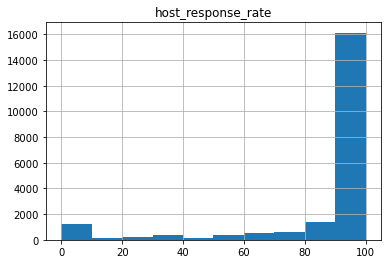

In [32]:
df1.hist(column='host_response_rate')

### host_acceptance_rate

In [33]:
df1['host_acceptance_rate'].unique()

array(['19%', '86%', nan, '33%', '100%', '0%', '29%', '67%', '97%', '74%',
       '76%', '95%', '77%', '85%', '89%', '83%', '98%', '9%', '46%',
       '11%', '75%', '61%', '73%', '20%', '44%', '92%', '93%', '96%',
       '59%', '50%', '25%', '78%', '2%', '8%', '58%', '66%', '35%', '81%',
       '45%', '6%', '88%', '38%', '40%', '39%', '60%', '99%', '87%',
       '91%', '36%', '80%', '15%', '71%', '90%', '53%', '63%', '52%',
       '30%', '69%', '84%', '94%', '21%', '56%', '79%', '31%', '64%',
       '43%', '17%', '62%', '18%', '27%', '82%', '72%', '23%', '65%',
       '57%', '13%', '32%', '55%', '47%', '68%', '22%', '42%', '48%',
       '49%', '4%', '28%', '70%', '16%', '3%', '41%', '14%', '12%', '54%',
       '10%', '5%', '51%', '24%', '26%', '7%', '34%', '37%', '1%'],
      dtype=object)

In [34]:
df1['host_acceptance_rate'].isna().sum()

15102

Convert values from strings to numeric values

In [35]:
#Remove % sign
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.strip('%')
#Convert to numeric values
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].astype('float')

### host_is_superhost

Changing **t/f** values to Boolean values:

In [36]:
df1 = df1.replace({'host_is_superhost': {'t':True, 'f':False}})

In [37]:
df1['host_is_superhost'].isna().sum()

111

### host_has_profile_pic

Changing **t/f** values to Boolean values:

In [38]:
df1 = df1.replace({'host_has_profile_pic': {'t':True, 'f':False}})

In [39]:
df1['host_has_profile_pic'].isna().sum()

111

### host_identity_verified

Changing the **t/f** values to Boolean values:

In [40]:
df1 = df1.replace({'host_identity_verified': {'t':True, 'f':False}})

In [41]:
df1['host_identity_verified'].isna().sum()

111

### host_listings_count & host_total_listings_count

In [42]:
df1['host_listings_count'].isna().sum()

111

In [43]:
df1['host_total_listings_count'].isna().sum()

111

In [44]:
df1['host_listings_count'].value_counts()

1.0      16937
2.0       4911
0.0       4773
3.0       2133
4.0       1248
         ...  
73.0         1
75.0         1
42.0         1
653.0        1
283.0        1
Name: host_listings_count, Length: 90, dtype: int64

In [45]:
df1['host_total_listings_count'].value_counts()

1.0      16937
2.0       4911
0.0       4773
3.0       2133
4.0       1248
         ...  
73.0         1
75.0         1
42.0         1
653.0        1
283.0        1
Name: host_total_listings_count, Length: 90, dtype: int64

Check if these two columns have the same values.

In [46]:
df1['host_listings_count'].equals(df1['host_total_listings_count'])

True

These are the same columns! So, let's delete **host_total_listings_count**.

In [47]:
del df1['host_total_listings_count']

### neighbourhood_cleansed & neighbourhood_group_cleansed

In [48]:
pd.set_option("display.max_rows", None)
df1['neighbourhood_cleansed'].value_counts().to_frame()

,neighbourhood_cleansed
Bedford-Stuyvesant,2679
Williamsburg,2579
Harlem,1938
Bushwick,1687
Hell's Kitchen,1596
Midtown,1521
Upper West Side,1458
Upper East Side,1364
East Village,1186
Crown Heights,1177


In [49]:
df1['neighbourhood_cleansed'].isna().sum()

0

In [50]:
pd.set_option("display.max_rows", None)
df1['neighbourhood_group_cleansed'].value_counts().to_frame()

,neighbourhood_group_cleansed
Manhattan,16242
Brooklyn,14392
Queens,4950
Bronx,1026
Staten Island,313


In [51]:
df1['neighbourhood_group_cleansed'].isna().sum()

0

Rename the **neighborhood_cleansed** and **neighborhood_group_cleansed** columns.

In [52]:
df1.rename(columns = {'neighbourhood_cleansed':'neighbourhood', 'neighbourhood_group_cleansed':'borough'}, inplace = True)

### latitude & longitude

In [53]:
df1['latitude'].isna().sum()

0

In [54]:
df1['longitude'].isna().sum()

0

### price

First let's look at the **price** column in **df1**.

Remove dollar ($) signs and commas (,)

In [55]:
df1['price'] = df1['price'].str.strip('$')
df1['price'] = df1['price'].str.replace(',', '')

Convert from string to float

In [56]:
df1['price'] = df1['price'].astype('float')

In [57]:
df1['price'].isna().sum()

0

### **property_type**

**From the Data Dictionary:** Self selected property type. Hotels and Bed and Breakfasts are described as such by their hosts in this field

Taking a closer look at the column

In [58]:
df1['property_type'].unique()

array(['Entire rental unit', 'Entire guest suite',
       'Private room in rental unit', 'Private room in townhouse',
       'Private room in condominium (condo)', 'Private room in loft',
       'Entire loft', 'Private room in residential home',
       'Entire condominium (condo)', 'Entire residential home',
       'Entire townhouse', 'Private room in bed and breakfast',
       'Entire guesthouse', 'Private room in guest suite', 'Bus',
       'Room in boutique hotel', 'Shared room in loft',
       'Shared room in rental unit', 'Shared room in residential home',
       'Private room', 'Private room in hostel', 'Entire place',
       'Private room in guesthouse', 'Boat', 'Entire serviced apartment',
       'Room in aparthotel', 'Shared room in earth house', 'Floor',
       'Shared room in hostel', 'Room in serviced apartment',
       'Entire cottage', 'Shared room in condominium (condo)',
       'Private room in serviced apartment', 'Room in hotel', 'Cave',
       'Tiny house', 'Private 

In [59]:
df1['property_type'] = df1['property_type'].str.lower()

In [60]:
pd.DataFrame(df1['property_type'].value_counts()).head(50)

,property_type
entire rental unit,15563
private room in rental unit,11506
private room in residential home,1862
private room in townhouse,1130
entire residential home,1082
entire condominium (condo),1049
entire loft,602
entire townhouse,584
room in hotel,576
shared room in rental unit,433


Since there are so many different types of properties, many of which have relatively few listings under them, the property types can be categorized into the following:
1. rental unit
2. serviced apartment
3. townhouse
4. condominium (condo)
5. residential home
6. loft
7. guest suite
8. hotel
9. other

Whether the listing is for the entire place or is a shared place is listed in the following column **room_type**. Thus, removing that detail from these listings:

In [61]:
df1['property_type'] = df1['property_type'].str.replace("entire ", "")

In [62]:
df1['property_type'] = df1['property_type'].str.replace("private ", "")

In [63]:
df1['property_type'] = df1['property_type'].str.replace("room in ", "")

In [64]:
df1['property_type'] = df1['property_type'].str.replace("shared ", "")

Through the following steps, refine the categories:

In [65]:
df1['property_type'] = df1['property_type'].str.replace("boutique hotel", "hotel")

In [66]:
df1['property_type'] = df1['property_type'].str.replace("bed and breakfast", "hotel")

In [67]:
df1['property_type'] = df1['property_type'].str.replace("guesthouse", "guest house/suite")
df1['property_type'] = df1['property_type'].str.replace("guest suite", "guest house/suite")

In [68]:
df1['property_type'] = df1['property_type'].str.replace("bungalow", "residential home")
df1['property_type'] = df1['property_type'].str.replace("villa", "residential home")

In [69]:
df1.loc[~df1['property_type'].isin(['rental unit','serviced apartment','townhouse','condominium (condo)','residential home','loft', 'guest suite','hotel']), 'property_type'] = 'Other'

In [70]:
#Make the values Sentence Case
df1['property_type'] = df1['property_type'].str.capitalize()

In [71]:
pd.DataFrame(df1['property_type'].value_counts()).head(10)

,property_type
Rental unit,27502
Residential home,3048
Townhouse,1727
Condominium (condo),1469
Hotel,1054
Loft,917
Other,783
Serviced apartment,423


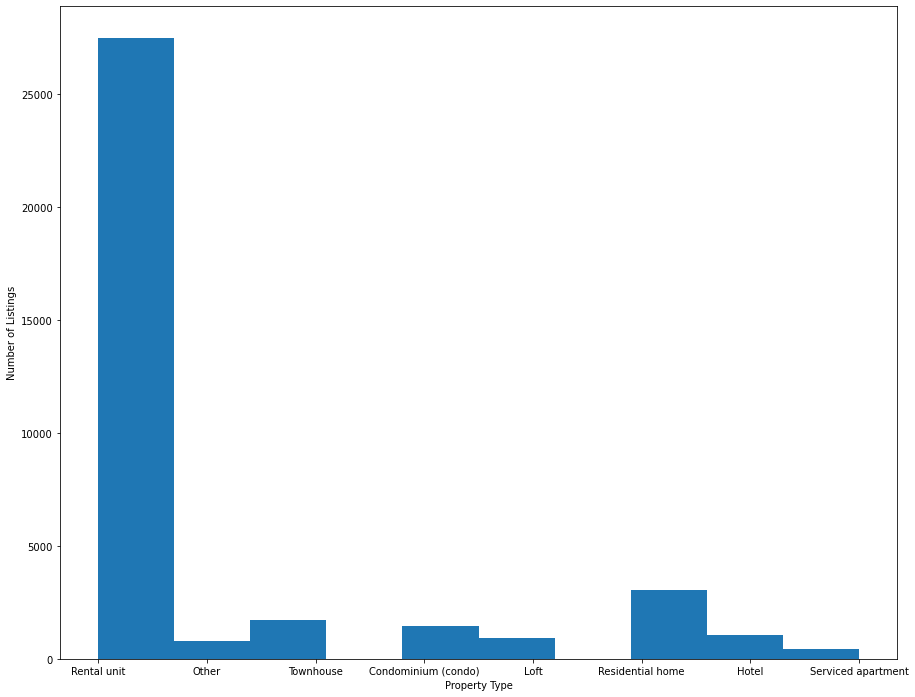

In [72]:
plt.figure(figsize=(15,12))
plt.hist(df1['property_type'])
plt.xlabel("Property Type")
plt.ylabel("Number of Listings")
plt.show()

### **room_type**

**From the Data Dictionary:** All homes are grouped into the following four room types:

1. **Entire places** are best if you're seeking a home away from home. With an entire place, you'll have the whole space to yourself. This usually includes a bedroom, a bathroom, a kitchen, and a separate, dedicated entrance. Hosts should note in the description if they'll be on the property or not (ex: "Host occupies first floor of the home"), and provide further details on the listing.

2. **Private rooms** are great for when you prefer a little privacy, and still value a local connection. When you book a private room, you'll have your own private room for sleeping and may share some spaces with others. You might need to walk through indoor spaces that another host or guest may occupy to get to your room.

3. **Shared rooms** are for when you don't mind sharing a space with others. When you book a shared room, you'll be sleeping in a space that is shared with others and share the entire space with other people. Shared rooms are popular among flexible travelers looking for new friends and budget-friendly stays.

4. **Hotel rooms** provide a level of service and hospitality associated with traditional hotels. They can be shared or private. The rooms are available in boutique or lifestyle hotels, hostels, bed and breakfasts, or similar properties. They typically include vibrant common areas and rooms with unique touches.

In [73]:
df1['room_type'].value_counts()

Entire home/apt    19674
Private room       16413
Shared room          578
Hotel room           258
Name: room_type, dtype: int64

In [74]:
df1['room_type'].isna().sum()

0

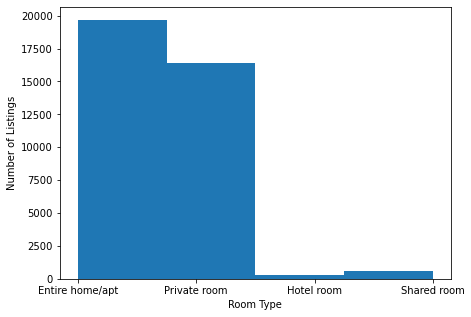

In [75]:
plt.figure(figsize=(7,5))
plt.hist(df1['room_type'], bins=4)
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()

### accommodates

**From the Data Dictionary:** The maximum capacity of the listing

In [76]:
df1['accommodates'].value_counts()

2     16777
1      6268
4      5650
3      3715
6      1681
5      1490
8       506
7       323
10      164
16      102
12       93
9        54
11       25
13       23
0        22
14       15
15       15
Name: accommodates, dtype: int64

There are 22 rows that indicate that the unit in question accommodates 0 people. 

In [77]:
df1[df1['accommodates']==0]

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,borough,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
27068,42830099,695.0,within an hour,89.0,100.0,False,9.0,"['email', 'phone']",True,True,SoHo,Manhattan,40.726380,-74.008850,Hotel,Hotel room,0,NaN,NaN,NaN,"[""Heating"", ""TV"", ""Fitness center"", ""Dedicated...",0.0,30,365,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,0,0,0,20,5,0,11/11/2019,6/27/2021,4.53,4.68,4.74,4.84,4.79,4.89,4.68,f,1,0,0,0,0.91
27250,43035720,624.0,not given,NaN,NaN,False,0.0,['phone'],False,True,Midtown,Manhattan,40.750280,-73.985470,Hotel,Hotel room,0,NaN,NaN,NaN,"[""Room service"", ""Onsite bar \u2014 Trademark ...",0.0,30,365,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
27302,43078550,572.0,not given,NaN,NaN,False,0.0,['phone'],True,True,Kips Bay,Manhattan,40.740970,-73.983390,Hotel,Hotel room,0,NaN,NaN,NaN,"[""Heating"", ""ReVolve toiletries"", ""Dedicated w...",0.0,30,365,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
27303,43078552,531.0,within an hour,100.0,97.0,False,8.0,"['email', 'phone']",True,True,Lower East Side,Manhattan,40.722140,-73.988570,Hotel,Hotel room,0,NaN,NaN,NaN,"[""Heating"", ""Nespresso machine"", ""Onsite resta...",0.0,1,28,NaN,NaN,NaN,NaN,NaN,NaN,t,0,0,0,0,59,33,0,4/19/2020,7/1/2021,3.88,3.92,4.34,4.22,3.93,4.42,3.92,f,1,0,0,0,3.53
27402,43205598,568.0,within an hour,100.0,100.0,False,0.0,"['email', 'phone']",True,True,Midtown,Manhattan,40.764480,-73.980550,Hotel,Hotel room,0,NaN,NaN,NaN,"[""Room service"", ""Self-parking \u2014 $45/day""...",0.0,1,365,NaN,NaN,NaN,NaN,NaN,NaN,t,0,0,0,0,9,9,0,10/10/2020,12/27/2020,4.11,4.22,4.00,4.33,4.56,4.33,4.11,f,1,0,0,0,0.83
27410,43212721,502.0,within an hour,90.0,0.0,False,0.0,"['email', 'phone']",True,True,Midtown,Manhattan,40.752210,-73.985350,Hotel,Hotel room,0,NaN,NaN,NaN,"[""Heating"", ""Self-parking \u2014 $50/day"", ""TV...",0.0,7,28,NaN,NaN,NaN,NaN,NaN,NaN,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
27428,43247386,569.0,within an hour,100.0,100.0,False,0.0,"['email', 'phone']",True,True,Hell's Kitchen,Manhattan,40.767560,-73.983120,Hotel,Hotel room,0,NaN,NaN,NaN,"[""Heating"", ""TV"", ""Safe"", ""Luggage dropoff all...",0.0,1,365,NaN,NaN,NaN,NaN,NaN,NaN,t,0,0,0,0,7,7,0,6/6/2021,7/9/2021,4.29,4.29,4.71,4.71,4.71,4.57,4.14,f,1,0,0,0,2.36
27429,43247472,604.0,not given,NaN,98.0,False,3.0,['phone'],True,True,Midtown,Manhattan,40.760850,-73.969380,Hotel,Hotel room,0,NaN,NaN,NaN,"[""Bottled water"", ""37\"" HDTV with Netflix, pre...",0.0,30,365,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,0,0,0,24,23,0,3/15/2020,5/2/2021,4.17,4.21,4.50,4.71,4.42,4.71,4.21,f,1,0,0,0,1.34
27430,43247631,623.0,not given,NaN,NaN,False,0.0,['phone'],False,True,Hell's Kitchen,Manhattan,40.761750,-73.988200,Hotel,Hotel room,0,NaN,NaN,NaN,"[""Heating"", ""Toiletries"", ""Safe"", ""Luggage dro...",0.0,30,365,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
28450,44567521,392.0,within an hour,90.0,79.0,False

Let's drop these rows.

In [78]:
df1.drop(df1.loc[df1['accommodates']==0].index, inplace=True)

### **bathrooms_text**

**From the Data Dictionary:** The number of bathrooms in the listing. 
(On the Airbnb web-site, the bathrooms field has evolved from a number to a textual description. For older scrapes, bathrooms is used.)

Explore **bathrooms_text** data

In [79]:
df1['bathrooms_text'].unique()

array(['1 bath', nan, '1.5 baths', '1 shared bath', '1 private bath',
       'Shared half-bath', '2 baths', '1.5 shared baths', '3 baths',
       'Half-bath', '2.5 baths', '2 shared baths', '0 baths',
       '0 shared baths', 'Private half-bath', '4.5 baths', '5.5 baths',
       '2.5 shared baths', '3.5 baths', '15.5 baths', '5 baths',
       '4 baths', '3 shared baths', '4 shared baths', '6 baths',
       '3.5 shared baths', '6 shared baths', '4.5 shared baths',
       '7.5 baths', '5 shared baths', '6.5 baths', '8 baths', '7 baths',
       '10 baths'], dtype=object)

In [80]:
df1['bathrooms_text'].isna().sum()

83

Create a new column **bathroom_type** that gives information on whether the bathroom is private or shared.

In [81]:
df1.loc[df1['bathrooms_text'].str.contains('shared', na=False), 'bathroom_type'] = 'Shared'

Assumption: If a listing does not specify that it contains a shared bathroom, it will be assumed to have private bathroom(s).

In [82]:
df1.loc[~df1['bathrooms_text'].str.contains('shared', na=False), 'bathroom_type'] = 'Private'

Remove attached words in the values so that the column can be converted to a float column.

In [83]:
#replace shared/private with empty string; replace half- with 0.5; replace bath/baths with empty string
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('Half-', '0.5')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('half-', '0.5')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('private', '')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('shared', '')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('Shared', '')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('Private', '')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('bath', '')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace('s','')
df1['bathrooms_text'] = df1['bathrooms_text'].str.replace(' ', '')
df1.head(10)

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,borough,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type
0,2595,4740.0,a few days or more,34.0,19.0,False,6.0,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Midtown,Manhattan,40.75356,-73.98559,Rental unit,Entire home/apt,1,1,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",150.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,5,35,65,340,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,3,3,0,0,0.33,Private
1,3831,4651.0,within a day,50.0,86.0,False,1.0,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Other,Entire home/apt,3,1,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",76.0,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,4,9,208,408,58,0,1/5/2015,6/29/2021,4.46,4.59,4.50,4.79,4.81,4.72,4.65,f,1,1,0,0,5.03,Private
2,5121,4593.0,within a day,100.0,NaN,False,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",True,True,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Rental unit,Private room,2,NaN,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Air co...",60.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,t,30,60,90,365,50,0,0,1/22/2014,6/5/2016,4.52,4.22,4.09,4.91,4.91,4.47,4.52,f,1,0,1,0,0.54,Private
3,5136,4593.0,within a day,50.0,33.0,False,1.0,"['email', 'phone', 'reviews']",True,True,Sunset Park,Brooklyn,40.66265,-73.99454,Rental unit,Entire home/apt,4,1.5,2.0,2.0,"[""Dryer"", ""BBQ grill"", ""Kitchen"", ""Long term s...",275.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,t,0,0,0,204,2,1,1,1/2/2014,8/8/2021,5.00,5.00,5.00,5.00,5.00,4.50,5.00,f,1,1,0,0,0.02,Private
4,5178,4565.0,within an hour,100.0,100.0,False,1.0,"['email', 'phone', 'facebook', 'reviews']",True,False,Midtown,Manhattan,40.76457,-73.98317,Rental unit,Private room,2,1,1.0,1.0,"[""Hot water"", ""Bed linens"", ""Extra pillows and...",68.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,t,1,5,14,243,490,17,2,8/18/2010,8/14/2021,4.21,4.20,3.73,4.66,4.40,4.86,4.36,f,1,0,1,0,3.64,Private
5,5203,4591.0,not given,NaN,NaN,False,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",True,True,Upper West Side,Manhattan,40.80380,-73.96751,Rental unit,Private room,1,1,1.0,1.0,"[""Hot water"", ""Smoke alarm"", ""Paid parking off...",75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,t,0,0,0,0,118,0,0,10/9/2010,7/12/2017,4.91,4.83,4.82,4.97,4.95,4.94,4.92,f,1,0,1,0,0.89,Shared
6,5803,4558.0,within a few hours,100.0,100.0,True,3.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",True,True,South Slope,Brooklyn,40.66801,-73.98784,Townhouse,Private room,2,1.5,1.0,0.0,"[""Dedicated workspace"", ""Iron"", ""Children\u201...",98.0,4,21,4.0,6.0,21.0,21.0,4.0,21.0,t,11,41,71,333,194,15,2,7/29/2010,8/23/2021,4.70,4.71,4.62,4.80,4.82,4.86,4.74,f,3,1,2,0,1.44,Private
7,6848,4501.0,not given,NaN,100.0,False,1.0,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Williamsburg,Brooklyn,40.70935,-73.95342,Rental unit,Entire home/apt,3,1,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",89.0,30,730,30.0,30.0,1125.0,1125.0,30.0,1125.

In [84]:
df1['bathrooms_text'].value_counts()

1       30760
2        3251
1.5      1676
2.5       380
3         297
0         182
3.5        80
4          74
0.5        66
4.5        21
5          11
6           7
5.5         5
8           3
15.5        1
7.5         1
6.5         1
7           1
10          1
Name: bathrooms_text, dtype: int64

Convert the string column to a float column.

In [85]:
df1['bathrooms_text'] = df1['bathrooms_text'].astype(float)

What to do with missing values?

In [86]:
df1['bathrooms_text'].isna().sum()

83

Since the number of missing values is less than 1% of the total rows, the rows with missing **bathrooms_text** data will be removed.

In [87]:
#remove rows with missing values
df1 = df1.dropna(subset=['bathrooms_text'])

Rename **bathrooms_text** to **bathrooms**

In [88]:
df1 = df1.rename(columns={'bathrooms_text': 'bathrooms'})

For the listings that don't have bathrooms, the **bathroom_type** will be labeled as "Unavailable."

In [89]:
df1.loc[df1['bathrooms']==0, 'bathroom_type'] = 'Unavailable'

In [90]:
df1['bathroom_type'].value_counts()

Private        25560
Shared         11076
Unavailable      182
Name: bathroom_type, dtype: int64

### bedrooms

**From the Data Dictionary:** The number of bedrooms

In [91]:
df1.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,borough,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathroom_type
0,2595,4740.0,a few days or more,34.0,19.0,False,6.0,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Midtown,Manhattan,40.75356,-73.98559,Rental unit,Entire home/apt,1,1.0,NaN,1.0,"[""Free street parking"", ""Heating"", ""TV"", ""Dedi...",150.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,t,5,35,65,340,48,0,0,11/21/2009,11/4/2019,4.70,4.72,4.62,4.76,4.79,4.86,4.41,f,3,3,0,0,0.33,Private
1,3831,4651.0,within a day,50.0,86.0,False,1.0,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Other,Entire home/apt,3,1.0,1.0,3.0,"[""Dedicated workspace"", ""Iron"", ""Stove"", ""Hair...",76.0,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,4,9,208,408,58,0,1/5/2015,6/29/2021,4.46,4.59,4.50,4.79,4.81,4.72,4.65,f,1,1,0,0,5.03,Private
3,5136,4593.0,within a day,50.0,33.0,False,1.0,"['email', 'phone', 'reviews']",True,True,Sunset Park,Brooklyn,40.66265,-73.99454,Rental unit,Entire home/apt,4,1.5,2.0,2.0,"[""Dryer"", ""BBQ grill"", ""Kitchen"", ""Long term s...",275.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,t,0,0,0,204,2,1,1,1/2/2014,8/8/2021,5.00,5.00,5.00,5.00,5.00,4.50,5.00,f,1,1,0,0,0.02,Private
4,5178,4565.0,within an hour,100.0,100.0,False,1.0,"['email', 'phone', 'facebook', 'reviews']",True,False,Midtown,Manhattan,40.76457,-73.98317,Rental unit,Private room,2,1.0,1.0,1.0,"[""Hot water"", ""Bed linens"", ""Extra pillows and...",68.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,t,1,5,14,243,490,17,2,8/18/2010,8/14/2021,4.21,4.20,3.73,4.66,4.40,4.86,4.36,f,1,0,1,0,3.64,Private
5,5203,4591.0,not given,NaN,NaN,False,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",True,True,Upper West Side,Manhattan,40.80380,-73.96751,Rental unit,Private room,1,1.0,1.0,1.0,"[""Hot water"", ""Smoke alarm"", ""Paid parking off...",75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,t,0,0,0,0,118,0,0,10/9/2010,7/12/2017,4.91,4.83,4.82,4.97,4.95,4.94,4.92,f,1,0,1,0,0.89,Shared


In [92]:
df1['bedrooms'].value_counts()

1.0     25418
2.0      5181
3.0      1677
4.0       478
5.0       110
6.0        29
8.0        12
7.0         9
9.0         4
10.0        3
14.0        1
11.0        1
13.0        1
Name: bedrooms, dtype: int64

In [93]:
df1['bedrooms'].isna().sum()

3894

This is a little over 10% of the total values. It will not be possible to drop the rows without skewing the data. 
Look for any patterns in the missing values.

<AxesSubplot:>

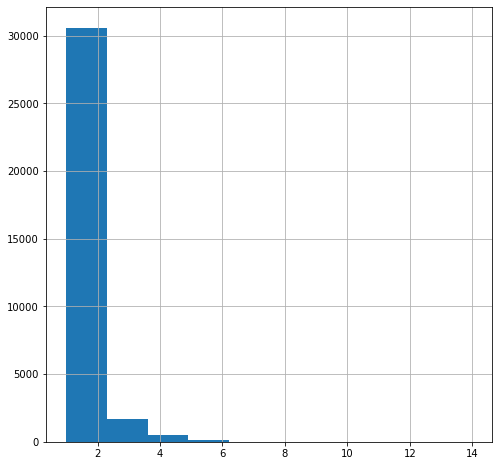

In [94]:
df1['bedrooms'].hist(figsize=(8,8))

Fill in missing values

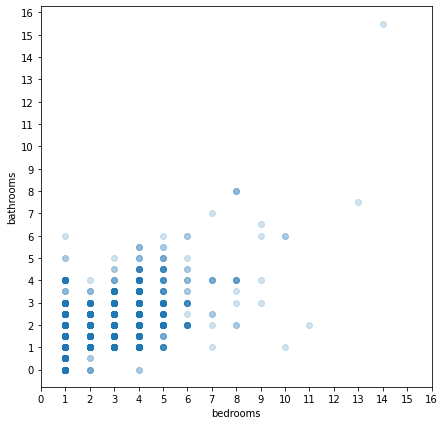

In [95]:
#plot bedrooms and bathrooms
ba = df1.bathrooms
be = df1.bedrooms
plt.scatter(be, ba, alpha=0.2)
plt.xlabel("bedrooms")
plt.ylabel("bathrooms")
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.gcf().set_size_inches(7, 7)
plt.show()

In [96]:
#df1['bathroom_cat'] = df1['bathroom'].apply(func)
df1[['bathrooms','bedrooms']].groupby('bathrooms').median()

,bedrooms
bathrooms,
0.0,1.0
0.5,1.0
1.0,1.0
1.5,1.0
2.0,2.0
2.5,3.0
3.0,3.0
3.5,4.0
4.0,4.0


As seen above, more often than not, the number of bedrooms and bathrooms are the same. Thus: 

In [97]:
df1.bedrooms = df1.bedrooms.fillna(df1.bathrooms)

In [98]:
df1['bedrooms'].isna().sum()

0

In [99]:
import math
df1.bedrooms = df1.bedrooms.apply(lambda x: math.ceil(x))

### beds

In [100]:
df1['beds'].value_counts()

1.0     22377
2.0      7681
3.0      2728
0.0      1500
4.0      1195
5.0       382
6.0       202
7.0        81
8.0        50
9.0        29
10.0       12
12.0        8
11.0        6
13.0        4
16.0        2
15.0        2
42.0        1
21.0        1
24.0        1
17.0        1
Name: beds, dtype: int64

In [101]:
df1['beds'].isna().sum()

555

In [102]:
df1['beds'].mean()

1.5319471637757494

In [103]:
df1['beds'].median()

1.0

In [104]:
df1['beds'].mode()

0    1.0
Name: beds, dtype: float64

Let's replace these missing values with the median.

In [105]:
df1['beds'].fillna(df1['beds'].median(), inplace=True)

### **amenities**

In [106]:
from ast import literal_eval


df1['amenities'] = df1['amenities'].apply(lambda row: literal_eval(row))

In [107]:
#Separating all the individual amenities

all_amenities = [value for sublist in df1['amenities'] for value in sublist]

from collections import Counter

result = Counter(all_amenities)

amens = result.most_common(50)

Choosing top 50 most common amenities

In [108]:
amens

[('Wifi', 35546),
 ('Long term stays allowed', 33950),
 ('Heating', 33269),
 ('Kitchen', 33075),
 ('Essentials', 32759),
 ('Smoke alarm', 32388),
 ('Air conditioning', 30724),
 ('Hangers', 27789),
 ('Carbon monoxide alarm', 27215),
 ('Hair dryer', 23174),
 ('Iron', 22897),
 ('Dedicated workspace', 22784),
 ('Shampoo', 22757),
 ('Hot water', 22153),
 ('TV', 18188),
 ('Dishes and silverware', 17299),
 ('Refrigerator', 17109),
 ('Cooking basics', 16281),
 ('Microwave', 15420),
 ('Fire extinguisher', 14548),
 ('Washer', 14504),
 ('Dryer', 14087),
 ('Stove', 13849),
 ('Oven', 13744),
 ('Coffee maker', 13604),
 ('Bed linens', 13577),
 ('Free street parking', 13554),
 ('First aid kit', 12656),
 ('Private entrance', 9105),
 ('Extra pillows and blankets', 9080),
 ('Lock on bedroom door', 8877),
 ('Elevator', 8744),
 ('Cable TV', 7651),
 ('TV with standard cable', 7395),
 ('Dishwasher', 6832),
 ('Luggage dropoff allowed', 6520),
 ('Security cameras on property', 5721),
 ('Bathtub', 5609),
 ('Loc

Some of these might have more weight/influence on the price than others, regardless of their frequency. 

In [109]:
amensdf = pd.DataFrame([result])
amensdf.T.head()

,0
Free street parking,13554
Heating,33269
TV,18188
Dedicated workspace,22784
Cleaning before checkout,1514


In the Exploratory Data Analysis phase of the data science method, techniques can be employed to understand and analyze how particular amenities affect the price of a listing and how much. Thus, this information, for now, will be left as is.

### minimum_nights and maximum_nights

In [110]:
df1['minimum_nights'].isna().sum()

0

In [111]:
df1['maximum_nights'].isna().sum()

0

Leave the columns as is.

In [112]:
df1['minimum_minimum_nights'].isna().sum()
df1['maximum_minimum_nights'].isna().sum()
df1['minimum_maximum_nights'].isna().sum()
df1['maximum_maximum_nights'].isna().sum()
df1['minimum_nights_avg_ntm'].isna().sum()
df1['maximum_nights_avg_ntm'].isna().sum()

0

Let's delete the above columns.

In [113]:
df1.drop('minimum_minimum_nights', axis=1, inplace=True)

In [114]:
df1.drop('maximum_minimum_nights', axis=1, inplace=True)

In [115]:
df1.drop('minimum_maximum_nights', axis=1, inplace=True)

In [116]:
df1.drop('maximum_maximum_nights', axis=1, inplace=True)

In [117]:
df1.drop('minimum_nights_avg_ntm', axis=1, inplace=True)

In [118]:
df1.drop('maximum_nights_avg_ntm', axis=1, inplace=True)

### **has_availability**

In [119]:
df1['has_availability'].unique()

array(['t', 'f'], dtype=object)

In [120]:
df1 = df1.replace({'has_availability': {'t':True, 'f':False}})

In [121]:
df1['has_availability'].isna().sum()

0

In [122]:
df1['has_availability'].dtype

dtype('bool')

### availability_30, availability_60, availability_90, availability_365

In [123]:
df1['availability_30'].isna().sum()

0

In [124]:
df1['availability_60'].isna().sum()

0

In [125]:
df1['availability_90'].isna().sum()

0

In [126]:
df1['availability_365'].isna().sum()

0

There are no missing values, so we'll leave the columns as is.

array([[<AxesSubplot:title={'center':'availability_30'}>,
        <AxesSubplot:title={'center':'availability_60'}>],
       [<AxesSubplot:title={'center':'availability_90'}>,
        <AxesSubplot:title={'center':'availability_365'}>]], dtype=object)

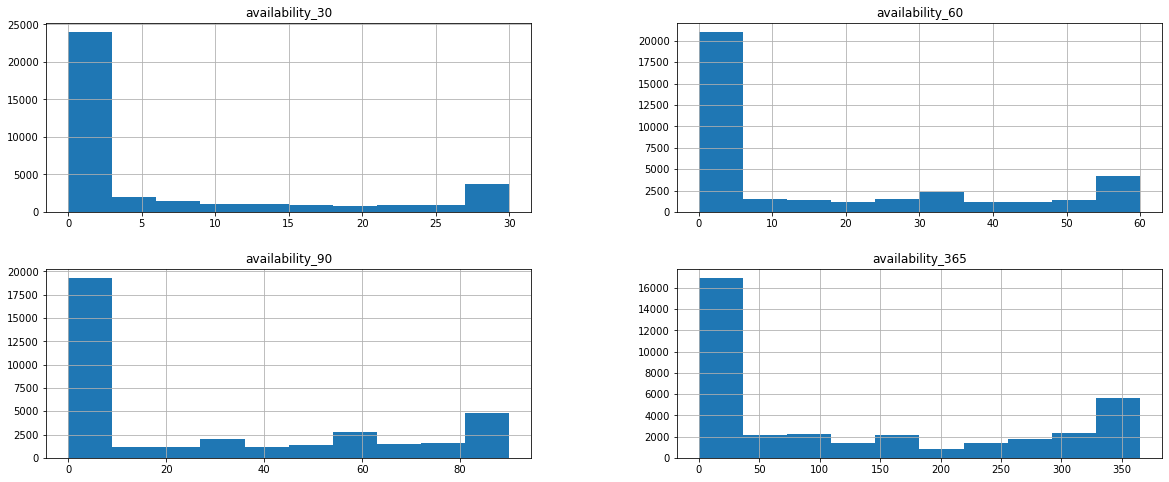

In [127]:
df1.hist(['availability_30', 'availability_60', 'availability_90', 'availability_365'], figsize=(20,8))

### number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d

**From the Data Dictionary:**
1. number_of_reviews = The number of reviews the listing has
2. number_of_reviews_ltm = The number of reviews the listing has (in the last 12 months)
3. number_of_reviews_l30d = The number of reviews the listing has (in the last 30 days)

In [128]:
df1['number_of_reviews'].isna().sum()
df1['number_of_reviews_ltm'].isna().sum()
df1['number_of_reviews_l30d'].isna().sum()

0

Keeping the columns as is.

array([[<AxesSubplot:title={'center':'number_of_reviews'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>],
       [<AxesSubplot:title={'center':'number_of_reviews_l30d'}>,
        <AxesSubplot:>]], dtype=object)

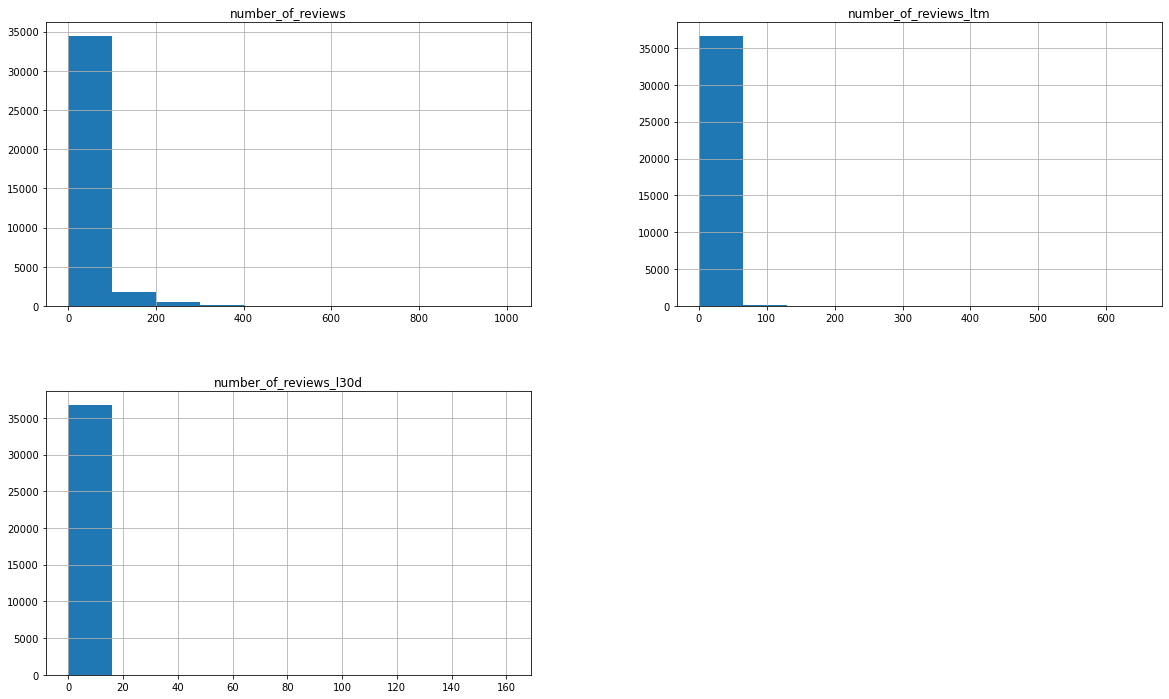

In [129]:
df1.hist(['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d'], figsize=(20,12))

<AxesSubplot:>

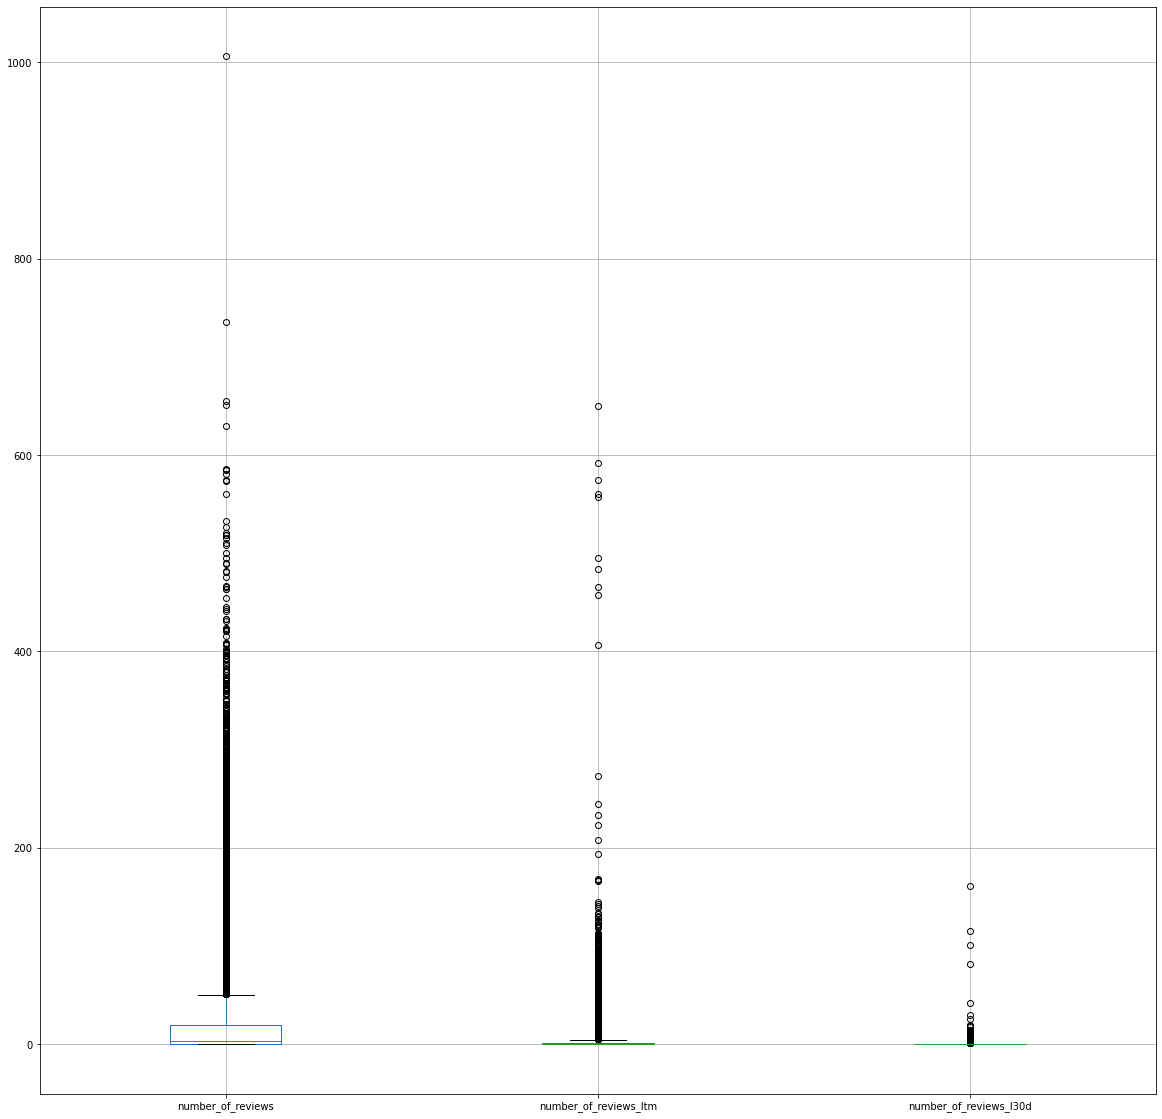

In [130]:
df1.boxplot(['number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d'], figsize=(20,20))

So, we should note that there are a lot of outliers here that are affecting our analysis. 

### first_review, last_review

Convert **first_review** and **last_review** to datetime

In [131]:
#Convert first_review to Datetime
df1['first_review'] = pd.to_datetime(df1['first_review'])

In [132]:
df1['first_review'].dtype=='datetime64[ns]'

True

In [133]:
#Convert last_review to Datetime
df1['last_review'] = pd.to_datetime(df1['last_review'])

In [134]:
df1['last_review'].dtype=='datetime64[ns]'

True

Instead of presenting the data in this column as dates, we can attempt to transform the column to reflect the number of days since the first and last review provided to a listing up to September 1, 2021 (when the data was extracted by InsideAirbnb).

In [135]:
df1['first_review'] = pd.to_datetime('2021-09-01') - df1['first_review']

In [136]:
df1['last_review'] = pd.to_datetime('2021-09-01') - df1['last_review']

In [137]:
df1['first_review'] = df1['first_review'].dt.days

In [138]:
df1['last_review'] = df1['last_review'].dt.days

Now let's look at missing values.

In [139]:
df1['first_review'].isna().sum()

9256

In [140]:
df1['last_review'].isna().sum()

9256

For both **first_review** and **last_review**, 25% of the values are missing. As this is a large proportion of the data, filling in the missing data or removing the rows containing missing values are not techniques that will work. 

It is important to note that the missing data could indicate that a quarter of the listings were not given ratings. This might have a potential affect on the price of the listing. Thus, the missing data will be kept.

### Various review_scores Columns

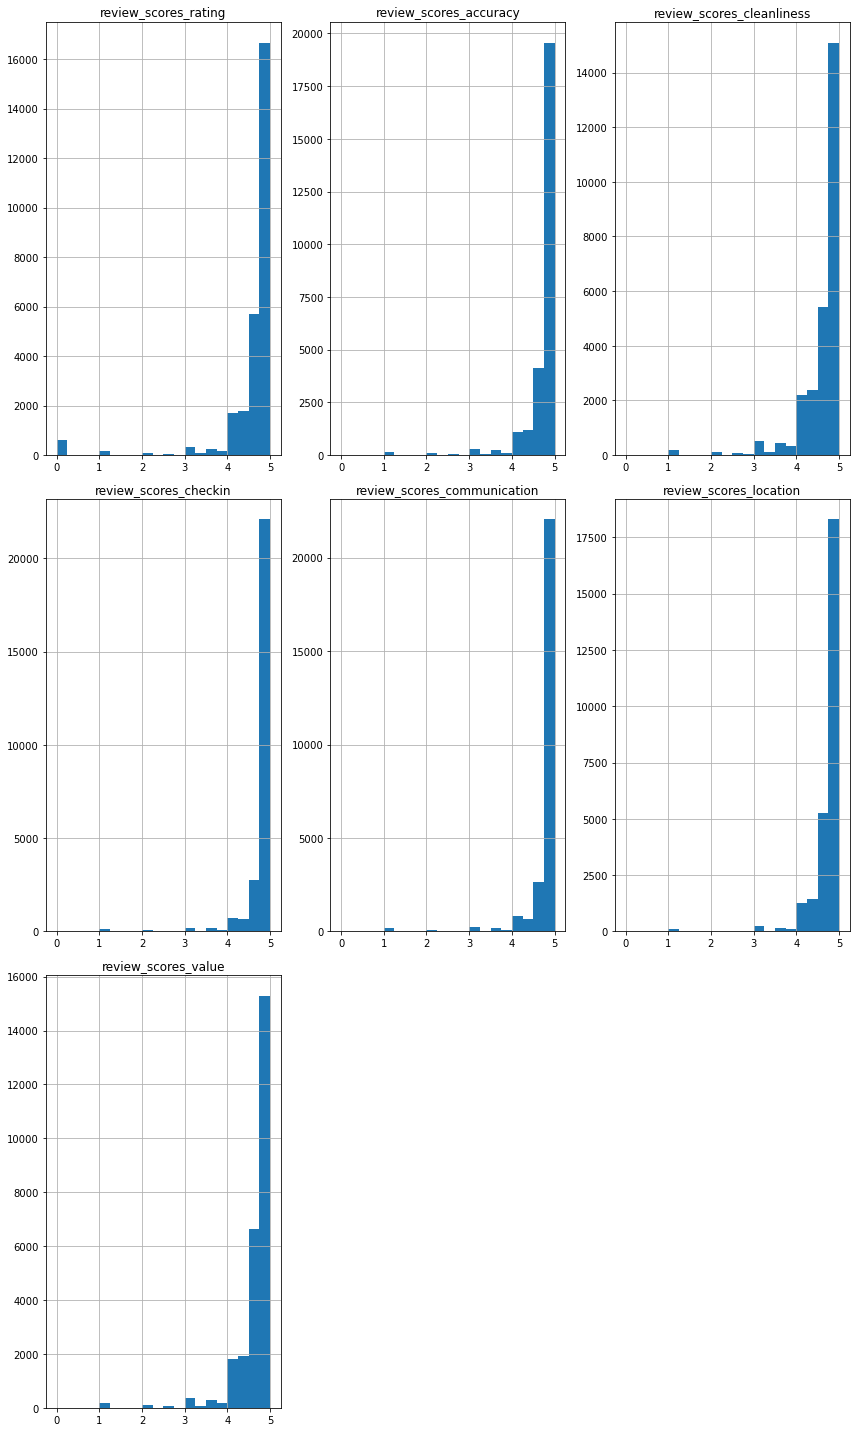

In [141]:
#Using 'hist' method to plot histograms in order to map the distributions
review_scores = df1[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']]
fig = plt.figure(figsize=(12,20))
for i, review in enumerate(review_scores):
    ax = fig.add_subplot(3,3,i+1)
    df1[review].hist(bins=20)
    ax.set_title(review)
fig.tight_layout()
plt.show()

All of these distributions have a long left tail.

Fill in missing values

In [142]:
df1['review_scores_rating'].isna().sum()
df1['review_scores_accuracy'].isna().sum()
df1['review_scores_cleanliness'].isna().sum()
df1['review_scores_checkin'].isna().sum()
df1['review_scores_communication'].isna().sum()
df1['review_scores_location'].isna().sum()
df1['review_scores_value'].isna().sum()

9895

As this is a large proportion of the data, filling in the missing data or removing the rows containing missing values are not techniques that will work.

It is important to note that the fact these values are missing might mean that reviews weren't provided and thus, might have a potential affect on the price of the listing. Hence, the columns will be left as is.

### **instant_bookable**

In [143]:
df1 = df1.replace({'instant_bookable': {'t':True, 'f':False}})

In [144]:
df1['instant_bookable'].isna().sum()

0

### reviews_per_month

**From Data Dictionary:** The number of reviews the listing has over the lifetime of the listing

In [145]:
df1['reviews_per_month'].isna().sum()

9256

As this is a large proportion of the data, filling in the missing data or removing the rows containing missing values are not techniques that will work.

It is important to note that the fact these values are missing might mean that reviews weren't provided and thus, might have a potential affect on the price of the listing. Hence, the columns will be left as is.

### calculated_host_listings Columns

In [146]:
df1['calculated_host_listings_count'].isna().sum()
df1['calculated_host_listings_count_entire_homes'].isna().sum()
df1['calculated_host_listings_count_private_rooms'].isna().sum()
df1['calculated_host_listings_count_shared_rooms'].isna().sum()

0

Leave columns as is.

## Reorder the Order of the Columns

In [147]:
df1 = df1.reindex(columns= ['id', 
                            'host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 
                            'neighbourhood', 'borough', 
                            'latitude', 'longitude', 
                            'property_type', 'room_type', 
                            'accommodates', 
                            'bathrooms', 'bathroom_type', 'bedrooms', 'beds', 
                            'amenities', 
                            'price',
                            'instant_bookable',
                            'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
                            'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 
                            'has_availability', 
                            'availability_30', 'availability_60', 'availability_90', 'availability_365',
                            'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
                            'first_review', 'last_review', 'reviews_per_month', 
                            'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                            'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 
                           ])

## Summary Statistics

In [148]:
df1.describe()

,id,host_since,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,3.681800e+04,36707.000000,21129.000000,21768.000000,36707.000000,0.0,36818.000000,36818.000000,36818.000000,36818.000000,36818.000000,36818.000000,36818.000000,36818.000000,3.681800e+04,0.0,0.0,0.0,0.0,0.0,0.0,36818.000000,36818.000000,36818.000000,36818.000000,36818.000000,36818.000000,36818.000000,27562.000000,27562.000000,27562.000000,27562.000000,26934.000000,26945.000000,26927.000000,26938.000000,26923.000000,26923.000000,36818.000000,36818.000000,36818.000000,36818.000000
mean,2.779580e+07,2059.950745,86.801316,75.649623,32.848803,NaN,40.729336,-73.949506,2.799962,1.154748,1.295019,1.523929,169.342523,22.598946,6.008411e+04,NaN,NaN,NaN,NaN,NaN,NaN,6.150877,15.943316,27.921886,124.153186,22.978407,4.039247,0.490820,1110.323924,607.480698,1.449364,4.578728,4.748134,4.611126,4.817928,4.814524,4.753501,4.651625,13.614781,6.803031,6.683361,0.051660
std,1.659162e+07,1020.382901,26.903420,30.392999,213.963372,NaN,0.055652,0.049863,1.857615,0.449898,0.689900,1.117161,299.317716,29.978804,1.119276e+07,NaN,NaN,NaN,NaN,NaN,NaN,9.961761,21.406163,33.657029,138.544626,49.337470,13.821634,1.811374,796.540806,677.204344,4.042300,0.854585,0.493347,0.576291,0.438787,0.457160,0.415399,0.514368,45.170807,31.308280,29.184468,0.460568
min,2.595000e+03,1.000000,0.000000,0.000000,0.000000,NaN,40.508630,-74.241350,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.264293e+07,1260.000000,90.000000,64.000000,1.000000,NaN,40.689460,-73.983370,2.000000,1.000000,1.000000,1.000000,70.000000,3.000000,6.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,546.000000,31.000000,0.110000,4.570000,4.710000,4.500000,4.820000,4.820000,4.670000,4.560000,1.000000,0.000000,0.000000,0.000000
50%,2.856610e+07,2142.000000,100.000000,89.000000,1.000000,NaN,40.725560,-73.955065,2.000000,1.000000,1.000000,1.000000,110.000000,30.000000,1.125000e+03,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,3.000000,61.000000,4.000000,0.000000,0.000000,995.500000,397.000000,0.440000,4.820000,4.900000,4.800000,4.960000,4.980000,4.880000,4.790000,1.000000,1.000000,0.000000,0.000000
75%,4.346636e+07,2811.500000,100.000000,99.000000,3.000000,NaN,40.762620,-73.931292,4.000000,1.000000,1.000000,2.000000,185.000000,30.000000,1.125000e+03,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,31.000000,60.000000,266.000000,20.000000,2.000000,0.000000,1724.000000,973.000000,1.510000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000
max,5.200698e+07,4758.000000,100.000000,100.000000,5069.000000,NaN,40.914194,-73.705240,16.000000,15.500000,14.000000,42.000000,10000.000000,1250.000000,2.147484e+09,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,60.000000,90.000000,365.000000,1006.000000,650.000000,161.000000,4406.000000,3907.000000,163.190000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,307.000000,297.000000,251.000000,10.000000


From a quick glance we can glean the following: <br>
• The average price is `$169.34`. The minimum price is `$10.00` and the maximum price is `$10,000`. <br>
• The average number of bathrooms, bedrooms and beds is approximately `1`. On the other hand, the minimum number is 0 and the maximum numbers are `15.5`, `14` and `42` respectively.
• The average minimum and maximum of nights available to stay in a rental unit is `22.6` and `60,084.1` respectively. The second value seems suspicious and should be noted for future consideration. <br>
• The average number of people accommodated by a unit is `~2.8`. The minimum is 1 and the maximum is 16. <br>
• The average number of reviews for a listing is `~23`, with minimum at `0` and maximum at `1000`. <br>

# Final Look At Datasets

In [149]:
df1.head()

,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,borough,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathroom_type,bedrooms,beds,amenities,price,instant_bookable,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2595,4740.0,a few days or more,34.0,19.0,False,6.0,NaN,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Midtown,Manhattan,40.75356,-73.98559,Rental unit,Entire home/apt,1,1.0,Private,1,1.0,"[Free street parking, Heating, TV, Dedicated w...",150.0,False,30,1125,NaN,NaN,NaN,NaN,NaN,NaN,True,5,35,65,340,48,0,0,4302.0,667.0,0.33,4.70,4.72,4.62,4.76,4.79,4.86,4.41,3,3,0,0
1,3831,4651.0,within a day,50.0,86.0,False,1.0,NaN,"['email', 'phone', 'reviews', 'offline_governm...",True,True,Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Other,Entire home/apt,3,1.0,Private,1,3.0,"[Dedicated workspace, Iron, Stove, Hair dryer,...",76.0,False,1,730,NaN,NaN,NaN,NaN,NaN,NaN,True,0,4,9,208,408,58,0,2431.0,64.0,5.03,4.46,4.59,4.50,4.79,4.81,4.72,4.65,1,1,0,0
3,5136,4593.0,within a day,50.0,33.0,False,1.0,NaN,"['email', 'phone', 'reviews']",True,True,Sunset Park,Brooklyn,40.66265,-73.99454,Rental unit,Entire home/apt,4,1.5,Private,2,2.0,"[Dryer, BBQ grill, Kitchen, Long term stays al...",275.0,False,5,1125,NaN,NaN,NaN,NaN,NaN,NaN,True,0,0,0,204,2,1,1,2799.0,24.0,0.02,5.00,5.00,5.00,5.00,5.00,4.50,5.00,1,1,0,0
4,5178,4565.0,within an hour,100.0,100.0,False,1.0,NaN,"['email', 'phone', 'facebook', 'reviews']",True,False,Midtown,Manhattan,40.76457,-73.98317,Rental unit,Private room,2,1.0,Private,1,1.0,"[Hot water, Bed linens, Extra pillows and blan...",68.0,False,2,14,NaN,NaN,NaN,NaN,NaN,NaN,True,1,5,14,243,490,17,2,4032.0,18.0,3.64,4.21,4.20,3.73,4.66,4.40,4.86,4.36,1,0,1,0
5,5203,4591.0,not given,NaN,NaN,False,1.0,NaN,"['email', 'phone', 'facebook', 'google', 'revi...",True,True,Upper West Side,Manhattan,40.80380,-73.96751,Rental unit,Private room,1,1.0,Shared,1,1.0,"[Hot water, Smoke alarm, Paid parking off prem...",75.0,False,2,14,NaN,NaN,NaN,NaN,NaN,NaN,True,0,0,0,0,118,0,0,3980.0,1512.0,0.89,4.91,4.83,4.82,4.97,4.95,4.94,4.92,1,0,1,0


In [150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36818 entries, 0 to 36922
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36818 non-null  int64  
 1   host_since                                    36707 non-null  float64
 2   host_response_time                            36818 non-null  object 
 3   host_response_rate                            21129 non-null  float64
 4   host_acceptance_rate                          21768 non-null  float64
 5   host_is_superhost                             36707 non-null  object 
 6   host_listings_count                           36707 non-null  float64
 7   host_total_listings_count                     0 non-null      float64
 8   host_verifications                            36818 non-null  object 
 9   host_has_profile_pic                          36707 non-null 

In [151]:
df1.to_csv('C:\\Users\\cssv9\\Desktop\\SB DS\\df1.csv')